# 城市气候与海洋的关系研究

导入包

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

导入数据各个海滨城市数据

In [2]:
def read_data():
    file_list=os.listdir(os.getcwd())
    df = pd.DataFrame(columns=['Unnamed: 0','temp','humidity','pressure','description','dt','wind_speed','wind_deg','city','day','dist'])
    for file in file_list:
        if os.path.isfile(file):
            filename,ext=os.path.splitext(file)
            if ext == '.csv':
                data = pd.read_csv(f'./{file}')
                df = pd.concat((df,data),ignore_index=True)
    return df

In [3]:
data = read_data()

In [4]:
data.set_index('city',inplace=True)

In [5]:
data.sort_index(inplace=True)

In [6]:
data

Unnamed: 0   temp humidity pressure       description          dt  \
city                                                                       
Asti            0  28.05       66     1014      Sky is Clear  1436863176   
Asti            1  29.51       64     1014      Sky is Clear  1436866759   
Asti            2  30.39       58     1017      Sky is Clear  1436870510   
Asti            3  31.10       54     1017      Sky is Clear  1436874098   
Asti            4  33.23       45     1016        few clouds  1436877645   
Asti            5  32.95       46     1016        few clouds  1436881329   
Asti            6  34.31       46     1015        few clouds  1436884929   
Asti            7  32.47       49     1015        few clouds  1436888513   
Asti            8  34.28       46     1015        few clouds  1436892132   
Asti            9  31.41       46     1014      Sky is Clear  1436895723   
Asti           10  29.72       58     1014      Sky is Clear  1436899336   
Asti           11  27.68       62     1015      Sky is Clear  1436902943   
Asti           12  26.44       69     1015      Sky is Clear  1436906532   
Asti           13  26.17       69     1016      Sky is Clear  1436910149   
Asti           14  25.21       78     1014      Sky is Clear  1436913739   
Asti           15  24.45       73     1016      Sky is Clear  1436917311   
Asti           16  24.32       73     1016      Sky is Clear  1436920931   
Asti           17  24.24       73     1016      Sky is Clear  1436924426   
Asti           18  24.00       73     1016      Sky is Clear  1436928078   
Asti           19  23.00       83     1017     broken clouds  1436931718   
Asti           20  23.00       78     1017  scattered clouds  1436935298   
Asti           21  25.00       73     1017        few clouds  1436938882   
Asti           22  27.00       65     1017        few clouds  1436942516   
Asti           23  27.00       65     1017      Sky is Clear  1436945951   
Asti            0  28.79       54     1012      Sky is Clear  1437730850   
Asti            1  30.02       58     1012      Sky is Clear  1437734493   
Asti            2  30.79       49     1007        light rain  1437738045   
Asti            3  32.02       51     1011        few clouds  1437741579   
Asti            4  30.93       51     1011        few clouds  1437745188   
Asti            5  29.12       48     1009        light rain  1437748777   
...           ...    ...      ...      ...               ...         ...   
Torino         14  21.75       64     1009     broken clouds  1437781191   
Torino         15  23.01       64     1009      Sky is Clear  1437784762   
Torino         16  22.39       64     1009        light rain  1437788332   
Torino         17  21.50       73     1009  scattered clouds  1437791949   
Torino         18  21.84       83     1009  scattered clouds  1437795572   
Torino         19  21.84       77     1009     broken clouds  1437799177   
Torino         20  21.50       88     1010     broken clouds  1437802719   
Torino         21  23.54       78     1010      Sky is Clear  1437806353   
Torino         22  25.72       64     1010      Sky is Clear  1437809920   
Torino         23  25.84       64     1010      Sky is Clear  1437813560   
Torino          0  23.80       64     1019      Sky is Clear  1435387651   
Torino          1  24.68       60     1018      Sky is Clear  1435390804   
Torino          2  25.12       60     1018      Sky is Clear  1435394206   
Torino          3  25.54       60     1018      Sky is Clear  1435398681   
Torino          4  27.42       57     1017      Sky is Clear  1435402112   
Torino          5  28.97       47     1017      Sky is Clear  1435405743   
Torino          6  29.36       45     1017      Sky is Clear  1435409402   
Torino          7  30.56       45     1015      Sky is Clear  1435416605   
Torino          8  31.04       48     1015      Sky is Clear  1435420220   
Torino          9  31.32       48     1014      Sky is 

查看行数

In [7]:
data.index

Index(['Asti', 'Asti', 'Asti', 'Asti', 'Asti', 'Asti', 'Asti', 'Asti', 'Asti',
       'Asti',
       ...
       'Torino', 'Torino', 'Torino', 'Torino', 'Torino', 'Torino', 'Torino',
       'Torino', 'Torino', 'Torino'],
      dtype='object', name='city', length=675)

去除没用的列

In [8]:
data.drop(columns='Unnamed: 0',inplace=True)

In [9]:
data

temp humidity pressure       description          dt  wind_speed  \
city                                                                        
Asti    28.05       66     1014      Sky is Clear  1436863176        2.57   
Asti    29.51       64     1014      Sky is Clear  1436866759        1.54   
Asti    30.39       58     1017      Sky is Clear  1436870510        2.60   
Asti    31.10       54     1017      Sky is Clear  1436874098        2.10   
Asti    33.23       45     1016        few clouds  1436877645        2.10   
Asti    32.95       46     1016        few clouds  1436881329        2.10   
Asti    34.31       46     1015        few clouds  1436884929        2.10   
Asti    32.47       49     1015        few clouds  1436888513        2.10   
Asti    34.28       46     1015        few clouds  1436892132        1.50   
Asti    31.41       46     1014      Sky is Clear  1436895723        2.10   
Asti    29.72       58     1014      Sky is Clear  1436899336        2.10   
Asti    27.68       62     1015      Sky is Clear  1436902943        1.50   
Asti    26.44       69     1015      Sky is Clear  1436906532        1.50   
Asti    26.17       69     1016      Sky is Clear  1436910149        1.50   
Asti    25.21       78     1014      Sky is Clear  1436913739        0.51   
Asti    24.45       73     1016      Sky is Clear  1436917311        2.60   
Asti    24.32       73     1016      Sky is Clear  1436920931        2.60   
Asti    24.24       73     1016      Sky is Clear  1436924426        2.10   
Asti    24.00       73     1016      Sky is Clear  1436928078        1.50   
Asti    23.00       83     1017     broken clouds  1436931718        0.50   
Asti    23.00       78     1017  scattered clouds  1436935298        3.10   
Asti    25.00       73     1017        few clouds  1436938882        1.50   
Asti    27.00       65     1017        few clouds  1436942516        0.50   
Asti    27.00       65     1017      Sky is Clear  1436945951        2.10   
Asti    28.79       54     1012      Sky is Clear  1437730850        3.10   
Asti    30.02       58     1012      Sky is Clear  1437734493        3.10   
Asti    30.79       49     1007        light rain  1437738045        2.06   
Asti    32.02       51     1011        few clouds  1437741579        4.10   
Asti    30.93       51     1011        few clouds  1437745188        2.60   
Asti    29.12       48     1009        light rain  1437748777        2.10   
...       ...      ...      ...               ...         ...         ...   
Torino  21.75       64     1009     broken clouds  1437781191        4.10   
Torino  23.01       64     1009      Sky is Clear  1437784762        2.10   
Torino  22.39       64     1009        light rain  1437788332        1.50   
Torino  21.50       73     1009  scattered clouds  1437791949        0.50   
Torino  21.84       83     1009  scattered clouds  1437795572        1.00   
Torino  21.84       77     1009     broken clouds  1437799177        1.50   
Torino  21.50       88     1010     broken clouds  1437802719        1.50   
Torino  23.54       78     1010      Sky is Clear  1437806353        0.50   
Torino  25.72       64     1010      Sky is Clear  1437809920        1.00   
Torino  25.84       64     1010      Sky is Clear  1437813560        1.50   
Torino  23.80       64     1019      Sky is Clear  1435387651        1.00   
Torino  24.68       60     1018      Sky is Clear  1435390804        2.10   
Torino  25.12       60     1018      Sky is Clear  1435394206        2.60   
Torino  25.54       60     1018      Sky is Clear  1435398681        2.60   
Torino  27.42       57     1017      Sky is Clear  1435402112        2.10   
Torino  28.97       47     1017      Sky is Clear  1435405743        1.50   
Torino  29.36       45     1017      Sky is Clear  1435409402        1.50   
Torino  30.56       45     1015      Sky is Clear  1435416605        2.10   
Torino  31.04       48     1015      Sky is Clear  1435420220        1.00   
Torin

各城市与海洋距离，最高温度，最低温度，最高湿度，最低湿度

In [10]:
data = data.convert_objects(convert_numeric=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
dist = data['dist'].unique()
dist

array([315,  71,  14,  37,  47, 121, 250, 200,   8, 357], dtype=int64)

In [12]:
temp_max = np.array(data.groupby(by='city')['temp'].max())
temp_min = np.array(data.groupby(by='city')['temp'].min())
hum_max = np.array(data.groupby(by='city')['humidity'].max())
hum_min = np.array(data.groupby(by='city')['humidity'].min())
hum_mean = np.array(data.groupby(by='city')['humidity'].mean())

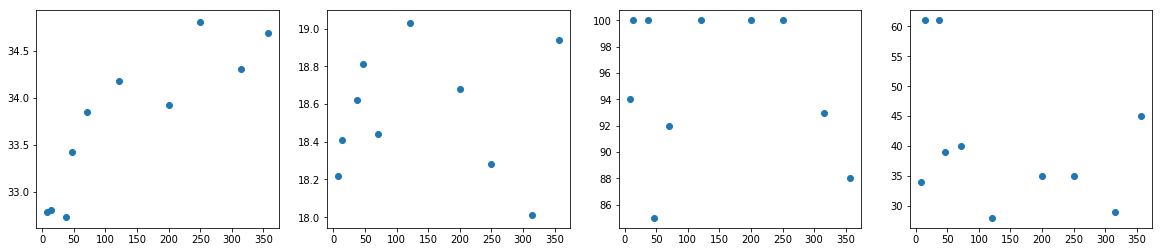

In [13]:
plt.figure(figsize=(4*5,4))
axes1 = plt.subplot(1,4,1)
axes1 = plt.scatter(dist,temp_max)
# axes1.set_title('距离与最高温度的关系')


axes2 = plt.subplot(1,4,2)
axes2 = plt.scatter(dist,temp_min)

axes3 = plt.subplot(1,4,3)
axes3 = plt.scatter(dist,hum_max)

axes4 = plt.subplot(1,4,4)
axes4 = plt.scatter(dist,hum_min)


显示最高温度与离海远近的关系

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']

Text(0.5,1,'最高温度与离海近远关系')

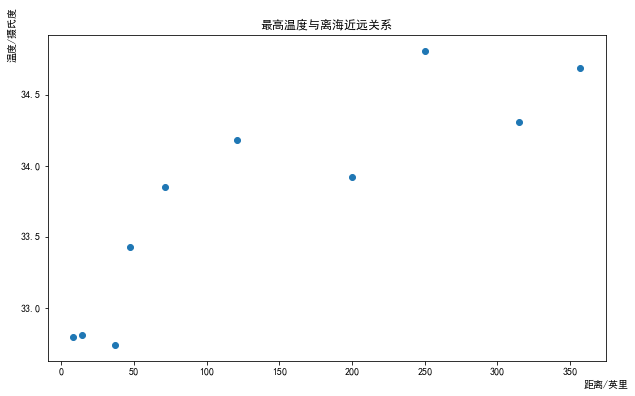

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(dist,temp_max)
plt.xlabel('距离/英里',position=(1,0))
plt.ylabel('温度/摄氏度',position=(0,1))
plt.title('最高温度与离海近远关系')

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

使用支持向量机计算回归参数

查看最低温度与海洋距离的关系

Text(0.5,1,'最低温度与离海近远关系')

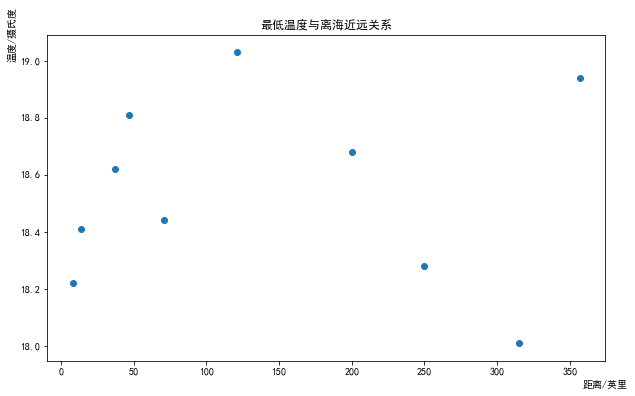

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(dist,temp_min)
plt.xlabel('距离/英里',position=(1,0))
plt.ylabel('温度/摄氏度',position=(0,1))
plt.title('最低温度与离海近远关系')

最低湿度与海洋距离的关系

Text(0.5,1,'最低湿度与离海近远关系')

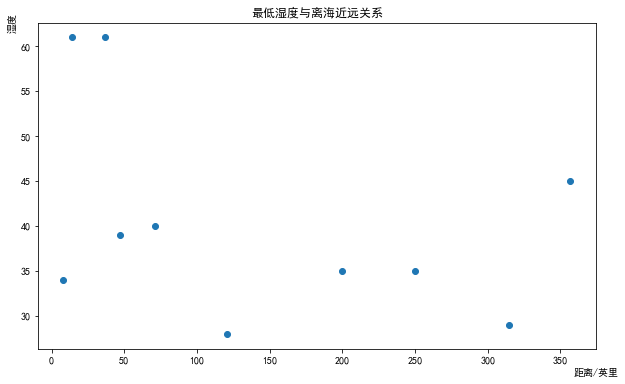

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(dist,hum_min)
plt.xlabel('距离/英里',position=(1,0))
plt.ylabel('湿度',position=(0,1))
plt.title('最低湿度与离海近远关系')

最高湿度与海洋距离的关系

Text(0.5,1,'最高湿度与离海近远关系')

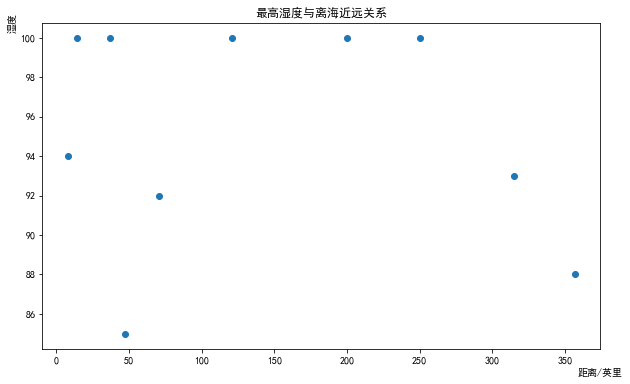

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(dist,hum_max)
plt.xlabel('距离/英里',position=(1,0))
plt.ylabel('湿度',position=(0,1))
plt.title('最高湿度与离海近远关系')

平均湿度与海洋距离的关系

Text(0.5,1,'平均湿度与离海近远关系')

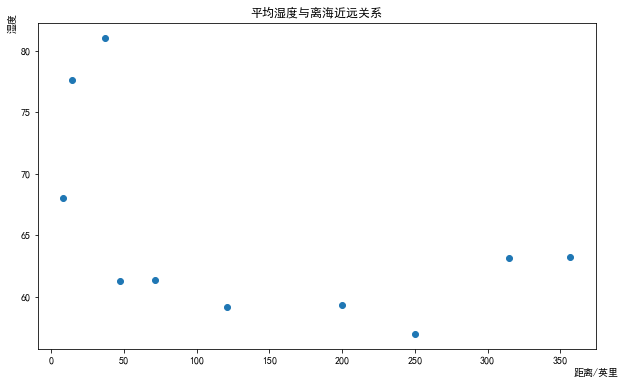

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(dist,hum_mean)
plt.xlabel('距离/英里',position=(1,0))
plt.ylabel('湿度',position=(0,1))
plt.title('平均湿度与离海近远关系')

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

风向与风速的关系

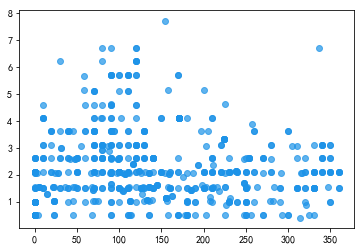

In [20]:
wind_speed = data['wind_speed']
wind_deg = data['wind_deg']
plt.scatter(wind_deg,wind_speed,color='#1d93e8',alpha=0.7)

在子图中，同时比较风向与湿度和风力的关系

Text(0,1,'风力')

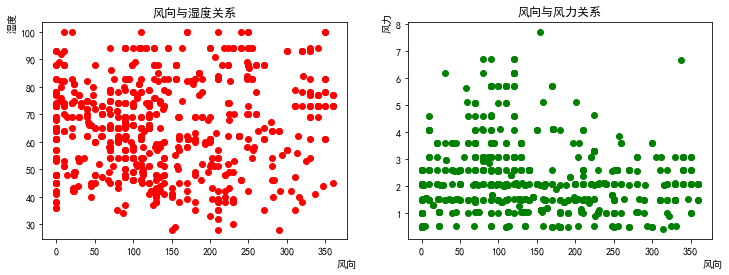

In [21]:
hum = data['humidity']
plt.figure(figsize=(2*6,4))
axes1 = plt.subplot(1,2,1)
axes1 = plt.scatter(wind_deg,hum,color='r')
plt.title('风向与湿度关系')
plt.xlabel('风向',position=(1,0))
plt.ylabel('湿度',position=(0,1))

pres = data['wind_speed']
axes2 = plt.subplot(1,2,2)
axes2 = plt.scatter(wind_deg,pres,c='g')
plt.title('风向与风力关系')
plt.xlabel('风向',position=(1,0))
plt.ylabel('风力',position=(0,1))

可以看到散点图显示效果不好

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

In [29]:
wd = data.loc['Ferrara']['wind_deg']
ws = data.loc['Ferrara']['wind_speed']

<BarContainer object of 68 artists>

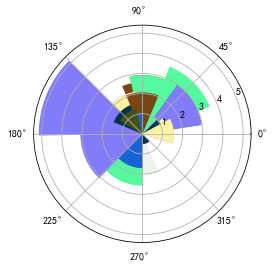

In [35]:
plt.axes(polar=True)
plt.bar(x=wd*np.pi/180,height=ws,color=np.random.rand(8,3))

用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

In [38]:
y,x=np.histogram(wd,bins=8,range=[0,360])
y,x

(array([12, 11, 14, 11,  9,  9,  2,  0], dtype=int64),
 array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360.]))

In [37]:
plt.bar(x[:-1],y,width=20)

<BarContainer object of 8 artists>

计算米兰各个方向上的风速

In [51]:
ml = data.loc['Milano'][['wind_speed','wind_deg']]
ml

wind_speed  wind_deg
city                        
Milano         2.1     100.0
Milano         2.6       0.0
Milano         2.6     140.0
Milano         2.1       0.0
Milano         3.1      80.0
Milano         2.1       0.0
Milano         2.1     230.0
Milano         3.1     220.0
Milano         2.6     210.0
Milano         4.1     210.0
Milano         2.1     220.0
Milano         2.1     200.0
Milano         2.1     200.0
Milano         0.5       0.0
Milano         1.0       0.0
Milano         1.5      70.0
Milano         1.5      80.0
Milano         2.6      80.0
Milano         1.0       0.0
Milano         1.0      90.0
Milano         1.5     140.0
Milano         1.0       0.0
Milano         1.5      60.0
Milano         3.1     100.0
Milano         3.6      90.0
Milano         2.6      70.0
Milano         3.1      80.0
Milano         3.6     130.0
Milano         3.6     130.0
Milano         2.6       0.0
...            ...       ...
Milano         2.6     140.0
Milano         3.6      30.0
Milano         2.1     350.0
Milano         4.6      10.0
Milano         2.6       0.0
Milano         1.5     110.0
Milano         1.5      10.0
Milano         1.0       0.0
Milano         1.5     200.0
Milano         0.5       0.0
Milano         1.0       0.0
Milano         1.5      70.0
Milano         2.6     140.0
Milano         2.1     160.0
Milano         1.5     210.0
Milano         2.1     220.0
Milano         2.6     210.0
Milano         2.1     230.0
Milano         2.6     250.0
Milano         3.1     220.0
Milano         2.6     270.0
Milano         1.5     310.0
Milano         2.1     200.0
Milano         2.1     210.0
Milano         4.6     120.0
Milano         2.6      90.0
Milano         2.6      50.0
Milano         2.6      40.0
Milano         2.6      40.0
Milano         0.5       0.0

[66 rows x 2 columns]

将各个方向的风速保存在列表中

In [54]:
ml=ml.values

画出各个方向的风速

<BarContainer object of 66 artists>

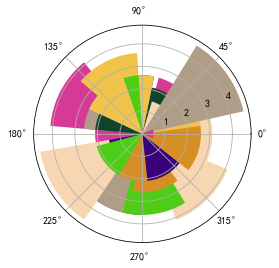

In [99]:
plt.axes(polar=True)
plt.bar(x=ml[:,1],height=ml[:,0],color=np.random.rand(8,3))

将上面步骤写成函数

In [102]:
def dge_speed(city):
    city_data = data.loc[city][['wind_speed','wind_deg']].values
    plt.axes(polar=True)
    return plt.bar(x=city_data[:,1],height=city_data[:,0],color=np.random.rand(8,3))